In [1]:
import pandas as pd
from time import sleep
from random import shuffle

In [18]:
import insta as IG
insta = IG.Instagram()
insta.login()

In [31]:
insta.get_follow('followers')

.............................................................

In [32]:
insta.get_follow('following')

..................................................................

In [6]:
insta.get_photos()

In [33]:
follower = pd.read_pickle('followers.pickle')
follower.shape

(785, 6)

In [34]:
following = pd.read_pickle('following.pickle')
following.shape

(1091, 6)

In [46]:
following = following.sort_values('time_first')
following_not_follower = [x for x in following[following['time_last'] == max(following['time_last'])]['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

464 ['jucazarim', 'biagioussky', 'sundaloxxa', 'nilmamorcerf', 'myriampinheiro', 'inessdamasc', 'biancavollmer', 'richardmetri', 'claudionrc', 'diogosouza01', 'gabrielfonsecasoares', 'akaciccio', 'luduarte7', 'karen_mktdigital', 'a_mar_denia', 'hugobcmt', 'jorge_porfirio_as', 'lucasmsporto', 'phbottino23', 'gomessoaresrenata', 'eduardosantos2308', 'anaghis', 'andre.fernandes001', 'delunaanderson', 'popohvs', 'anapaulaprado10', 'anaclarabcastro', 'marcellogt.rio', 'fonsecamarcosfelipe', 'lara_pmp', 'adrienchaltiel', 'bianca.moreirabm', 'gautlmx', 'flaviocotrimpinheiro', 'pedroasti', 'josecarmelomastrangelo', 'pgsiviero', 'thiagompc', 'mila.campbell', 'peenricoarrig', 'leonardoloriato', 'anahissa', 'karen_fajardo_horn', 'danielhrs', 'labasence', 'helfereduardo', 'dani_calazans', 'juanita_rugby', 'flavio.costa.357284', 'mitpics', 'dueumesmo', 'raphaelyurivianna', 'mcynthus', 'katia.rocha.rj', 'ngasparelli', 'apolomvp', 'lai.amaral', 'gloria.vianna.37', 'luiz_gustavo_rinke', 'professoratam

In [36]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

377 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [6]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,352,352,352,352,352
Seguir,412,412,412,412,412
Solicitado,20,20,20,20,20


In [7]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [8]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
783,2019-08-15 20:55:48.864655,2019-08-15 20:55:48.864655,djudjo,SAUDAR - Fabio Alves,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/7f5...
782,2019-08-15 20:55:48.864655,2019-08-15 20:55:48.864655,marianadsfernandes24,mariana fernandes,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/648...
775,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,jequitibarugby,Jequitibá Rugby Clube,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/dd4...
769,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,biancacscheffer,Bianca scheffer,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e3a...
770,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,psicologatalitaaguiar,Psicóloga Talita Aguiar,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6fb...
771,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,uisleirodriguesfragoso,Uislei Rodrigues Fragoso,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/805...
772,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,arthurmarsico,Arthur Gonçalves,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/535...
774,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,seenufrj,SEEN UFRJ,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/48d...
773,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,luizfernandu74,lᴜɪζ fεʀηαηdο,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/9e2...
776,2019-08-15 00:59:38.140687,2019-08-15 20:55:48.864655,eliandropereirada,Eliandro Pereira da Silva,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/dd7...


In [9]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
474,2019-08-01 10:43:26.593775,2019-08-02 10:37:08.772824,adhy_inv,ADHY Investment,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/85d...


In [10]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
1083,2019-08-15 21:02:30.758793,2019-08-15 21:02:30.758793,lucasbastos1986,Lucas Bastos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/8ff...
1082,2019-08-15 21:02:30.758793,2019-08-15 21:02:30.758793,evelinamorim,Evelin,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e85...
1081,2019-08-15 21:02:30.758793,2019-08-15 21:02:30.758793,danielfelipeallves,Daniel Felipe,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c32...
1075,2019-08-15 01:07:12.837244,2019-08-15 21:02:30.758793,fabioaieta,Fabio Aieta Sartorio,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/27b...
1069,2019-08-15 01:07:12.837244,2019-08-15 21:02:30.758793,isah_oliveyra,Isah Oliveira👢,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/51f...
1070,2019-08-15 01:07:12.837244,2019-08-15 21:02:30.758793,bru_ferreira_,Bruna Ferreira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/476...
1071,2019-08-15 01:07:12.837244,2019-08-15 21:02:30.758793,arthurmarsico,Arthur Gonçalves,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/535...
1073,2019-08-15 01:07:12.837244,2019-08-15 21:02:30.758793,jorgejacob,Jorge Jacob,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/447...
1074,2019-08-15 01:07:12.837244,2019-08-15 21:02:30.758793,_julianasza,Juliana Rodrigues,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6c4...
1072,2019-08-15 01:07:12.837244,2019-08-15 21:02:30.758793,eliza_csantos,Eliza Santos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/4ae...


In [11]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
578,2019-08-03 16:31:25.281430,2019-08-04 17:50:28.684857,globoesportecom,GloboEsporte.com,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3d2...
431,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,araujodiogoo,Diogo Araujo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/80...
590,2019-08-04 22:13:41.081369,2019-08-04 22:13:41.081369,bemartins.ml,Bernardo Martins,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6b9...
611,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,daianymv,Daiany Macieira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2c9...
610,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,maiarabarreto,Maiara Barreto,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/4e6...
609,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,simone_menezes5,Simone,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ec2...
607,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,arthjuh,júuh santos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/736...
606,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,rick_f_r_a_s_e_s_,Ricardo Oliveira.❤,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/489...
605,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,psico.loga,Psi,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1f5...


In [43]:
following[following['time_last'] == max(following['time_last'])].sort_values('time_first')

,time_first,time_last,username,name,status,img
353,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,palhadoze,Palha do Zé,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/95...
104,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,gilmariosantosco,Gilmário santos conrado,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/ec...
254,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,raf.pit,Rafael,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/f1...
253,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,tchos,Matheus Brito,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/e6...
105,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,monique.rj,Monique,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/54...
294,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,luizrinke,Luiz Gustavo Rinke,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/82...
250,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,henriqueqgalvao,Henrique Galvao,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/a4...
249,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,psicologaclaracarr,Clara Carr,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/27...
248,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,fernando.hey,Fernando Hey,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/c9...
106,2019-07-30 10:29:44.220296,2019-08-16 01:11:33.634763,josemarcelopimenta,Jose Marcelo Pimenta,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/a4...


In [12]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [13]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
847,2019-07-30 10:29:44.220296,2019-08-06 16:21:23.181522,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
926,2019-07-30 10:29:44.220296,2019-08-15 01:07:12.837244,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-09 08:32:17.126650,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
533,2019-08-04 17:25:00.382049,2019-08-15 20:55:48.864655,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
580,2019-08-06 18:13:11.314843,2019-08-15 20:55:48.864655,85millysantos,Jamilly Santos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/9e1...
620,2019-08-07 19:51:20.508949,2019-08-15 20:55:48.864655,______lor.rabbit,lor rabbit,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1be...
197,2019-07-29 22:30:54.216241,2019-08-15 20:55:48.864655,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
1464,2019-08-06 17:00:23.497341,2019-08-07 22:52:36.378524,_bimiranda,Bianca,Seguindo,https://instagram.fbtz1-5.fna.fbcdn.net/vp/b2d...
598,2019-08-07 19:51:20.508949,2019-08-15 20:55:48.864655,_direitonapratica_,Samanta Pimenta,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2f5...


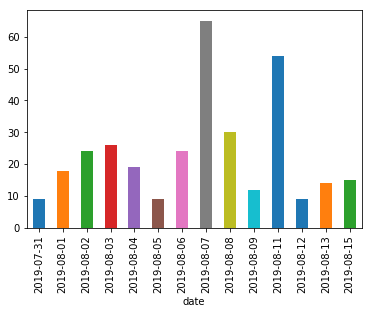

In [20]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[2:].plot(kind='bar')

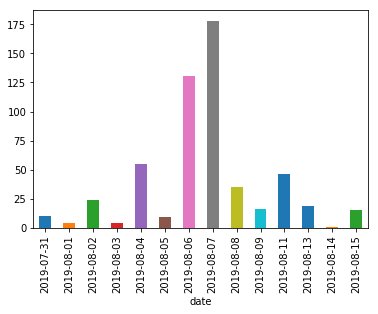

In [15]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')

In [37]:
#shuffle(following_not_follower)
following_not_follower


['chapolinsincero',
 'globoesportecom',
 'bemartins.ml',
 'dionelima2012',
 'brithanyhausenbek',
 'drikaoliver15',
 '_gabysousa97',
 'adrianafinamori',
 'daianymv',
 'maiarabarreto',
 'simone_menezes5',
 'renatacartagenes',
 'arthjuh',
 'rick_f_r_a_s_e_s_',
 'psico.loga',
 'larissadias506',
 'douglasabnovato',
 'bruna_acampos',
 'polly.diedio',
 'laisf_castilho',
 'marcosmadala',
 'thamartins_129',
 'wsalvarani',
 'tami.bastos',
 'leandrod89',
 'trlynek97',
 'tatiperotti',
 'alex.2m',
 'paulamoryn',
 'thalitailva',
 'irissamarafarias',
 'deisyolc',
 'marciafloripaoficial',
 'debora_amorimoficial',
 'geelcarvalho',
 'francys_mara',
 'tania_m_martins',
 'camilahenri',
 'semea.assaf',
 'alexandreandredacosta',
 'biajardim81',
 'rpdickie',
 'paulofroimtchuk',
 'casluperez',
 'gustavofroitzheim',
 'victorvaacs',
 'camilamarcoccia_psicologa',
 'aleixofelipe',
 'yahoofinance',
 'monicamansur',
 'allinetblemos',
 'dr.igorlucena',
 'anittanavegantes',
 'tuliothome',
 'carol_pires_free',
 'zeze.

In [48]:
for user in following_not_follower[50:150]:
    try:
        insta.unfollow_user(user)
        sleep(.3)
    except:
        print('unfollow ',user)

Unfollowing  dueumesmo
Unfollowing  raphaelyurivianna
Unfollowing  mcynthus
Unfollowing  katia.rocha.rj
Unfollowing  ngasparelli
Unfollowing  apolomvp
Unfollowing  lai.amaral
Unfollowing  gloria.vianna.37
Unfollowing  luiz_gustavo_rinke
Unfollowing  professoratamarayoga
Unfollowing  camilota1
Unfollowing  dricarneiroinrio
Unfollowing  pedro.mouracosta
Unfollowing  silvinaramal
Unfollowing  barrionuevomauro
Unfollowing  vollmermarcus
Unfollowing  angelamaria.rocha.71
Unfollowing  josemarcelopimenta
Unfollowing  fernando.hey
Unfollowing  psicologaclaracarr
Unfollowing  henriqueqgalvao
Unfollowing  monique.rj
Unfollowing  raspberrypifoundation
Unfollowing  marcosaraujo2005
Unfollowing  brk70
unfollow  paty_marques
Unfollowing  paulabcleite
Unfollowing  flavia.m.dos.anjos
Unfollowing  cecilsoares83
Unfollowing  nathsurf16
Unfollowing  clarasaddi
Unfollowing  mariliazangrandi
Unfollowing  camilansouto
Unfollowing  palhadoze
Unfollowing  nathiquintanilha
Unfollowing  vivijaccoud
Unfollowing 